<a href="https://colab.research.google.com/github/DhruvBohara/Synapse-Tasks/blob/master/task_2_synapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


DATA CLEANING:

In [3]:
df = pd.read_json("/content/data.json", orient = 'split')

In [4]:
print(df)

          category  ... amount
0           Sports  ...    NaN
1       Technology  ...    NaN
2      Environment  ...    NaN
3       Technology  ...    NaN
4           Sports  ...    NaN
...            ...  ...    ...
49995       Sports  ...   35.0
49996   Technology  ...    NaN
49997      Fashion  ...    NaN
49998       Sports  ...   37.0
49999      Fashion  ...    NaN

[50000 rows x 10 columns]


In [5]:
df.columns

Index(['category', 'event_name', 'gender', 'age', 'marital_status',
       'session_id', 'device', 'client_time', 'location', 'amount'],
      dtype='object')

In [6]:
df.head()


,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:00:04,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,2014-03-01 00:00:22,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,2014-03-01 00:00:32,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,2014-03-01 00:00:38,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014-03-01 00:00:51,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN


In [8]:
df1 = df.query('event_name in ["Fund Project"]')

In [9]:
print(df1)

          category  ... amount
11         Fashion  ...   61.0
16          Sports  ...   31.0
18      Technology  ...   39.0
25      Technology  ...   36.0
35          Sports  ...   40.0
...            ...  ...    ...
49989       Sports  ...   37.0
49992      Fashion  ...   25.0
49994  Environment  ...   35.0
49995       Sports  ...   35.0
49998       Sports  ...   37.0

[20658 rows x 10 columns]


In [10]:
df2 = df1.query('category in ["Sports", "Environment"]')

In [11]:
print(df2)

          category  ... amount
16          Sports  ...   31.0
35          Sports  ...   40.0
78          Sports  ...   53.0
100         Sports  ...   48.0
131         Sports  ...   27.0
...            ...  ...    ...
49984  Environment  ...   23.0
49989       Sports  ...   37.0
49994  Environment  ...   35.0
49995       Sports  ...   35.0
49998       Sports  ...   37.0

[8268 rows x 10 columns]


In [12]:
df2.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:03:20,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",31.0
35,Sports,Fund Project,M,18-24,married,be389e9be0e74398adcef3292ac409ee,android,2014-03-01 00:06:35,"{'latitude': 45.408374, 'city': 'Lake Oswego',...",40.0
78,Sports,Fund Project,F,18-24,single,71ca342ead4f4da180da4f9b4baaf760,android,2014-03-01 00:18:38,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",53.0
100,Sports,Fund Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,2014-03-01 00:24:18,"{'latitude': 33.794055, 'city': 'Atlanta', 'st...",48.0
131,Sports,Fund Project,M,45-54,single,d23a964e8656403b853eb2a24139c408,android,2014-03-01 00:31:01,"{'latitude': 39.102704, 'city': 'Kansas City',...",27.0


In [13]:
df2['amount'].isnull().values.any()

False

In [14]:
df3 = pd.concat([df2,df2['location'].apply(pd.Series)], axis = 1).drop('location',axis = 1)

In [15]:
df3.head()


,category,event_name,gender,age,marital_status,session_id,device,client_time,amount,latitude,city,state,longitude,zip_code
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:03:20,31.0,40.189788,Lyons,CO,-105.355280,80540
35,Sports,Fund Project,M,18-24,married,be389e9be0e74398adcef3292ac409ee,android,2014-03-01 00:06:35,40.0,45.408374,Lake Oswego,OR,-122.691388,97034
78,Sports,Fund Project,F,18-24,single,71ca342ead4f4da180da4f9b4baaf760,android,2014-03-01 00:18:38,53.0,33.844371,Alpharetta,GA,-84.474050,30009
100,Sports,Fund Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,2014-03-01 00:24:18,48.0,33.794055,Atlanta,GA,-84.377326,30308
131,Sports,Fund Project,M,45-54,single,d23a964e8656403b853eb2a24139c408,android,2014-03-01 00:31:01,27.0,39.102704,Kansas City,MO,-94.595033,64105


DATA VISUALIZATION

In [16]:
import matplotlib.pyplot as plt

In [17]:
print(df3.groupby('age')['amount'].mean())

age
18-24    39.318681
25-34    39.863682
35-44    39.873062
45-54    38.686712
55+      39.662722
Name: amount, dtype: float64


In [18]:
print(df3.groupby('marital_status')['amount'].mean())

marital_status
married    39.402003
single     39.446609
Name: amount, dtype: float64


In [19]:
print(df3.groupby('gender')['amount'].mean())

gender
F    39.249679
M    39.584644
U    39.459936
Name: amount, dtype: float64


In [20]:
y = df3.groupby(['age','gender','marital_status'])['amount'].mean() 

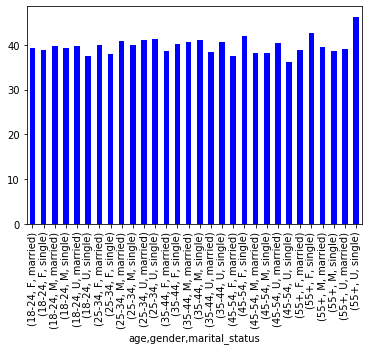

In [21]:
y.plot(kind='bar',color='blue')

In [22]:
grouped_single = df3.groupby('age').agg({'amount': ['mean', 'min', 'max']})

In [23]:
print(grouped_single)

          amount           
            mean  min   max
age                        
18-24  39.318681  1.0  88.0
25-34  39.863682  1.0  85.0
35-44  39.873062  1.0  86.0
45-54  38.686712  1.0  80.0
55+    39.662722  1.0  90.0


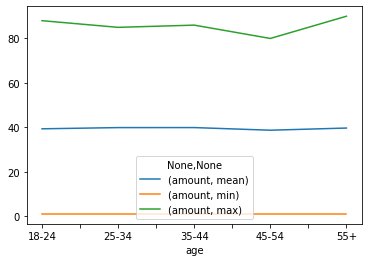

In [24]:
grouped_single.plot()

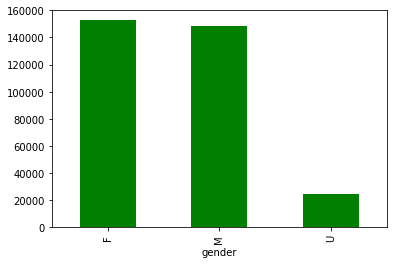

In [25]:
df3.groupby('gender')['amount'].aggregate(sum).plot(kind='bar',color='green')


In [26]:
grouped_multiple = df3.groupby(['age', 'gender']).agg({'amount': ['mean', 'min', 'max']})
print(grouped_multiple)

                 amount            
                   mean   min   max
age   gender                       
18-24 F       39.190380   1.0  88.0
      M       39.511442   1.0  84.0
      U       38.990964   1.0  78.0
25-34 F       39.052953   1.0  85.0
      M       40.573333   1.0  84.0
      U       41.093750   1.0  84.0
35-44 F       39.139721   1.0  86.0
      M       40.802198   1.0  81.0
      U       39.144737   1.0  72.0
45-54 F       39.203863   1.0  80.0
      M       38.145194   1.0  77.0
      U       39.000000  12.0  78.0
55+   F       39.880435   1.0  79.0
      M       39.255230   1.0  83.0
      U       40.907895   1.0  90.0


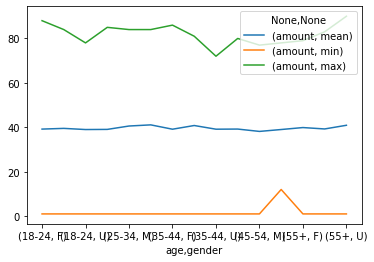

In [27]:
grouped_multiple.plot()

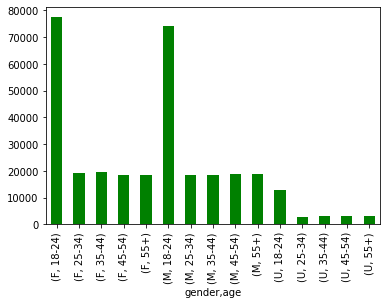

In [28]:
df3.groupby(['gender','age'])['amount'].aggregate(sum).plot(kind='bar',color='green')

In [29]:
pip install geopandas

     |████████████████████████████████| 972kB 2.9MB/s 
     |████████████████████████████████| 10.9MB 7.7MB/s 
     |████████████████████████████████| 14.8MB 244kB/s 


The locations of the people we are interested in


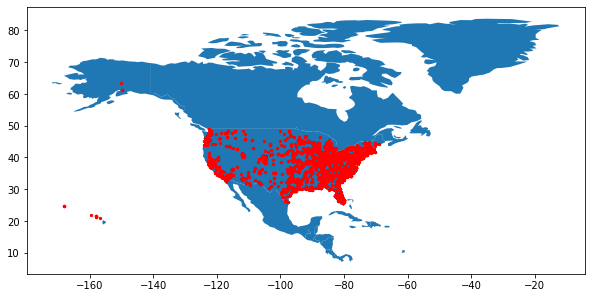

In [30]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
print('The locations of the people we are interested in')
geometry = [Point(xy) for xy in zip(df3['longitude'],df3['latitude'])]
g_df = GeoDataFrame(df3, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
g_df.plot(ax=world[world.continent == 'North America'].plot(figsize=(10,6)),marker='o',color = 'red',markersize=5);

In [31]:
df4 = df3.groupby('state')['amount'].sum()
df4

state
AK      139.0
AL     3352.0
AR     1424.0
AZ     2496.0
CA    16584.0
CO    36937.0
CT     1688.0
DC      119.0
DE      692.0
FL     8305.0
GA    50246.0
HI      543.0
IA     1634.0
ID      801.0
IL     5858.0
IN    60243.0
KS     1024.0
KY     3413.0
LA     1855.0
MA     3690.0
MD     3073.0
ME      270.0
MI     3880.0
MN     2182.0
MO     2785.0
MS      514.0
MT      646.0
NC     3666.0
ND      302.0
NE     2094.0
NH      299.0
NJ     3528.0
NM     1117.0
NV      789.0
NY     9665.0
OH     5782.0
OK     2422.0
OR    45543.0
PA     5549.0
RI      756.0
SC     2234.0
SD      528.0
TN     3587.0
TX    11818.0
UT     1362.0
VA     3538.0
VT      478.0
WA     3174.0
WI     2558.0
WV      532.0
WY      190.0
Name: amount, dtype: float64

The output of the code below is a map which can't be viewed directly in github, so open the file with google colab to view the map.

In [32]:

import pandas as pd
import folium
import os

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df4,
    columns=['state', 'amount'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Distribution of fund raisers in USA acc to the data',
).add_to(m)

folium.LayerControl().add_to(m)

m

